## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


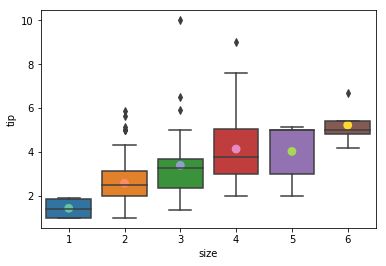

In [3]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2",errwidth=0)

In [4]:
# 画图方法

def compare_plot(*data):
    f, axes = plt.subplots(len(set(merge_csv1['chr']))+1, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    for n,da in enumerate(data):
        sns.distplot(da[da['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,n])
        sns.distplot(da[da['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,n])    
        axes[0,n].legend()
        for j,i in enumerate(set(da['chr'])):
            sns.distplot(da[(da['pool']=='POOL=1') & (da['chr']==i)]['depth'], 
                              kde=True,label='pool1-chr{}'.format(i),ax=axes[j+1,n])
            sns.distplot(da[(da['pool']=='POOL=2') &(da['chr']==i)]['depth'], 
                              kde=True,label='pool2-chr{}'.format(i),ax=axes[j+1,n])
            axes[j+1,n].legend()

第一列是分pool进行标准化，第二列为不分pool


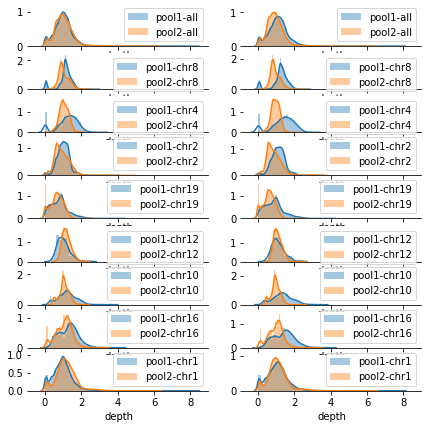

In [5]:
merge_csv1 = pd.read_csv('./demo_data/twopoolmerge.csv')
merge_csv1.columns=['tag','loc','pool','depth']
merge_csv1['chr-temp'] = merge_csv1['loc'].str.split(':')
merge_csv1['chr'] = merge_csv1['chr-temp'].str.get(0)
# print(merge_csv[''])

merge_csv2 = pd.read_csv('./demo_data/onePool.csv')
merge_csv2.columns=['tag','loc','depth','pool']
merge_csv2['chr-temp'] = merge_csv2['loc'].str.split(':')
merge_csv2['chr'] = merge_csv2['chr-temp'].str.get(0)
print('第一列是分pool进行标准化，第二列为不分pool')
compare_plot(merge_csv1,merge_csv2)

Text(1.5,5,'LDLR')

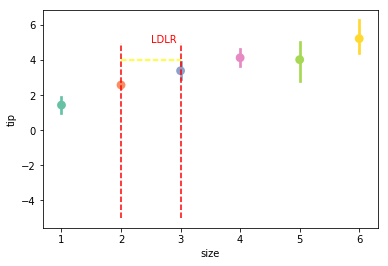

In [6]:
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2")
ax.plot([1,1],[-5,5],'--',color='red')
ax.plot([2,2],[-5,5],'--',color='red')
ax.plot([1,2],[4,4],'--',color='yellow')
ax.text(x=1.5,y=5,s='LDLR',color='red')

## Draw pdf or density

In [7]:
def draw_density(data,title,value):
    ax=sns.distplot(data[value],kde=True)
    ax.set_title(title)
    fig = ax.get_figure()
    fig.savefig('./demo_data/hist.png') 

        chr       loc     depth
0 -0.782258  1.194525 -0.739230
1 -0.332442  1.381938  0.736105
2  0.653431  0.323667 -0.439182
3 -1.650814  0.081996  0.863589
4  0.804903  0.329532  1.637261


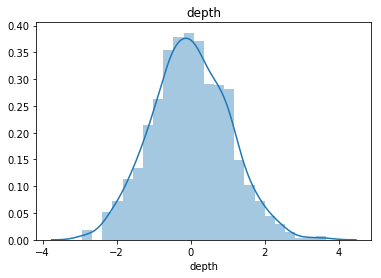

In [8]:
import numpy as np
data=pd.DataFrame(np.random.normal(0,1,(1000,3)),columns=['chr','loc','depth'])
print(data.head())
draw_density(data,'depth','depth')

In [9]:
import statsmodels.api as sm
data=pd.DataFrame(np.random.normal(0,1,(10000,4)),columns=['C','CHH','CG','CHG'])
ecdf = sm.distributions.ECDF(data['C'])
x = np.linspace(min(data['C']), max(data['C']))
y1 = ecdf(x)
ecdf = sm.distributions.ECDF(data['CHH'])
y2 = ecdf(x)
print(y1,y2)

[1.000e-04 2.000e-04 4.000e-04 5.000e-04 9.000e-04 1.500e-03 2.300e-03
 3.500e-03 6.200e-03 9.800e-03 1.460e-02 2.140e-02 3.110e-02 4.490e-02
 5.920e-02 8.150e-02 1.093e-01 1.395e-01 1.809e-01 2.257e-01 2.756e-01
 3.321e-01 3.938e-01 4.558e-01 5.196e-01 5.805e-01 6.430e-01 6.977e-01
 7.536e-01 8.026e-01 8.437e-01 8.782e-01 9.086e-01 9.322e-01 9.501e-01
 9.665e-01 9.778e-01 9.848e-01 9.894e-01 9.931e-01 9.962e-01 9.974e-01
 9.986e-01 9.992e-01 9.994e-01 9.999e-01 9.999e-01 9.999e-01 9.999e-01
 1.000e+00] [2.000e-04 2.000e-04 4.000e-04 5.000e-04 8.000e-04 1.700e-03 3.100e-03
 4.600e-03 6.800e-03 1.090e-02 1.770e-02 2.470e-02 3.460e-02 4.750e-02
 6.460e-02 8.830e-02 1.126e-01 1.452e-01 1.849e-01 2.328e-01 2.848e-01
 3.390e-01 3.976e-01 4.629e-01 5.255e-01 5.845e-01 6.423e-01 6.998e-01
 7.544e-01 7.992e-01 8.432e-01 8.779e-01 9.050e-01 9.302e-01 9.492e-01
 9.635e-01 9.737e-01 9.827e-01 9.884e-01 9.927e-01 9.959e-01 9.971e-01
 9.985e-01 9.991e-01 9.993e-01 9.996e-01 9.996e-01 9.997e-01 9.99

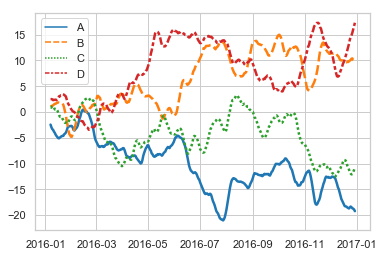

In [10]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [11]:
print(data.head())

             A   B   C   D
2016-01-01 NaN NaN NaN NaN
2016-01-02 NaN NaN NaN NaN
2016-01-03 NaN NaN NaN NaN
2016-01-04 NaN NaN NaN NaN
2016-01-05 NaN NaN NaN NaN


In [12]:
print(dates)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')
